In [1]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS
_stop_words = set(STOPWORDS)

stop_words = set(stopwords.words('english'))
stop_words.update(_stop_words, ('thing', 'u', 'us', 'nt'))
lemmatizer = WordNetLemmatizer()

# Read .txt files from ./docs directory into a corpus
corpus=PlaintextCorpusReader('./docs/',".*\.txt")
print("files in corpus:", corpus.fileids())

files in corpus: ['doc1.txt', 'doc2.txt', 'doc3.txt', 'doc4.txt', 'doc5.txt', 'doc6.txt']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\robk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\robk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
paragraphs=corpus.paras()
sentences=corpus.sents()

print("number of paragraphs: ", len(paragraphs)) # new lines not treated as paragraphs
print("number of sentences: ", len(sentences))

number of paragraphs:  6
number of sentences:  937


In [3]:
for fileid in corpus.fileids():
    num_chars = len(corpus.raw(fileid))
    num_words = len(corpus.words(fileid))
    num_sents = len(corpus.sents(fileid))
    num_vocab = len(set(w.lower() for w in corpus.words(fileid)))
    print(f"file[{fileid}]: chars per word: {round(num_chars/num_words)}, words per sentence:{round(num_words/num_sents)}, words/vocab:{round(num_words/num_vocab)}")

file[doc1.txt]: chars per word: 5, words per sentence:23, words/vocab:4
file[doc2.txt]: chars per word: 5, words per sentence:24, words/vocab:5
file[doc3.txt]: chars per word: 5, words per sentence:23, words/vocab:4
file[doc4.txt]: chars per word: 5, words per sentence:29, words/vocab:3
file[doc5.txt]: chars per word: 5, words per sentence:24, words/vocab:4
file[doc6.txt]: chars per word: 5, words per sentence:25, words/vocab:3


In [4]:
text = nltk.Text(corpus.words())
print(text)

<Text: Let me begin by saying thanks to all...>


In [5]:
# important collocations; was going to use ngrams and tf-idf, but not sure if needed
text.collocations() 

health care; John McCain; United States; Soviet Union; former Soviet;
Cooperative Threat; Threat Reduction; mass destruction; George Bush;
phased redeployment; American people; Middle East; foreign policy;
Iraqi government; international terrorism; 21st century; tax breaks;
work together; Social Security; Senator McCain


In [6]:
text.concordance('Soviet')

Displaying 13 of 13 matches:
Qaeda . And on a trip to the former Soviet Union , I have seen the biological 
once operated on the fringes of the Soviet biological weapons program . We ent
eft scattered throughout the former Soviet Union after the Cold War . But this
s by rogue states to recruit former Soviet weapons scientists ; terrorists sho
ns within the borders of the former Soviet Union represent the greatest threat
n Russia and the rest of the former Soviet Union so drastically different than
ntaining proliferation threats from Soviet - supplied , civilian research reac
ams . Throughout the Cold War , the Soviet Union was engaged in a massive unde
 in six countries across the former Soviet Union . And the Kiev story is headi
e size , secrecy , and scope of the Soviet biological weapons program , we are
 there are forces within the former Soviet Union and elsewhere that want these
ya , Russian meddling in the former Soviet Union - that raise serious question
 in 1963 about threats 

In [7]:
text.concordance('Iraq')

Displaying 25 of 64 matches:
trina happens , or the death toll in Iraq mounts , we ' ve been told that our 
until we bring an end to this war in Iraq . Most of you know I opposed this wa
se young veterans who come back from Iraq and Afghanistan , I see my grandfath
tor McCain was turning his sights to Iraq just days after 9 / 11 , I stood up 
time frame to remove our troops from Iraq has been echoed by the Iraqi governm
tration , even after we learned that Iraq has a $ 79 billion surplus while we 
tes in eighty countries by occupying Iraq . You don ' t protect Israel and det
y come home . I will end this war in Iraq responsibly , and finish the fight a
 We ' ve seen our children leave for Iraq and terrorists threaten to finish th
 roads paved and cell phones used in Iraq , no one will notice the nearly 2 , 
ith regards to America ’ s policy in Iraq . Americans were originally persuade
d wounds that will last a lifetime . Iraq is descending into chaos based on et
eda is successfully usi

In [8]:
text.concordance('America')

Displaying 25 of 54 matches:
y a small part in building a better America . My work took me to some of Chicag
ringfield , where I saw all that is America converge - farmers and teachers , b
cency , we can build a more hopeful America . And that is why , in the shadow o
r cities and rural towns all across America . And as our economy changes , let 
the generation that ends poverty in America . Every single person willing to wo
 will have universal health care in America by the end of the next president ' 
e the generation that finally frees America from the tyranny of oil . We can ha
 young lives that could have been . America , it ' s time to start bringing our
g our union , and building a better America . And if you will join me in this i
known , but shared a belief that in America , their son could achieve whatever 
ailed policies of George W . Bush . America , we are better than these last eig
lure . It ' s time for us to change America . You see , we Democrats have a ver
g to work .

In [9]:
text.concordance('war')

Displaying 25 of 43 matches:
 this country can be . In the face of war , you believe there can be peace . In
w what those challenges are today - a war with no end , a dependence on oil tha
hat tough talk and an ill - conceived war can replace diplomacy , and strategy 
to pass until we bring an end to this war in Iraq . Most of you know I opposed 
raq . Most of you know I opposed this war from the start . I thought it was a t
t the heart of someone else ' s civil war . That ' s why I have a plan that wil
 not too late to get right about this war - and that is the homecoming of the m
ents - a moment when our nation is at war , our economy is in turmoil , and the
 9 / 11 , I stood up and opposed this war , knowing that it would distract us f
s stubborn refusal to end a misguided war . That ' s not the judgment we need .
when they come home . I will end this war in Iraq responsibly , and finish the 
ded as a country . Whether it ' s the war or Katrina or their health care or th
ht about ho

In [10]:
text.collocation_list()

[('health', 'care'),
 ('John', 'McCain'),
 ('United', 'States'),
 ('Soviet', 'Union'),
 ('former', 'Soviet'),
 ('Cooperative', 'Threat'),
 ('Threat', 'Reduction'),
 ('mass', 'destruction'),
 ('George', 'Bush'),
 ('phased', 'redeployment'),
 ('American', 'people'),
 ('Middle', 'East'),
 ('foreign', 'policy'),
 ('Iraqi', 'government'),
 ('international', 'terrorism'),
 ('21st', 'century'),
 ('tax', 'breaks'),
 ('work', 'together'),
 ('Social', 'Security'),
 ('Senator', 'McCain')]

In [11]:
print(text.findall('<.*><.*><weapon><.*><.*>'))
print(text.common_contexts(['weapons']))

a nuclear weapon . For; construct a weapon of mass
None
nuclear_and of_of dangerous_, biological_program unguarded_.
nuclear_out strongest_your craved_of obtaining_of nuclear_terrorists
deadliest_that these_has pursuing_of soviet_scientists for_grade
some_experts biological_within nuclear_- biological_threat chemical_.
None


In [12]:
print("number of words in corpus:", len(corpus.words()))

freq_dist = nltk.FreqDist(corpus.words())
print("Top 50 words in the corpus:\n ", freq_dist.most_common(50)) # need to drop punctuation and stop words

number of words in corpus: 22939
Top 50 words in the corpus:
  [(',', 930), ('the', 906), ('.', 900), ('and', 670), ('to', 640), ('of', 535), ('that', 474), ('a', 435), ("'", 374), ('in', 353), ('we', 280), ('-', 259), ('I', 247), ('is', 221), ('our', 208), ('for', 199), ('s', 175), ('this', 172), ('it', 133), ('on', 128), ('have', 127), ('be', 121), ('can', 115), ('will', 108), ('with', 105), ('are', 105), ('And', 103), ('you', 101), ('more', 96), ('who', 93), ('t', 93), ('as', 93), ('us', 87), ('not', 86), ('from', 85), ('has', 81), ('their', 76), ('was', 73), ('what', 71), ('or', 71), ('all', 69), ('they', 69), ('by', 68), ('people', 68), ('about', 65), ('been', 64), ('Iraq', 64), ('We', 62), ('but', 61), ('It', 60)]


In [13]:
# filter list of words to remove uneeded ones and punctuation
# losing U.S. which is not ideal, tried splitting sentences on spaces and preserving dots just for it
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
tokenized = tokenizer.tokenize(corpus.raw())

print('tokens\' length:\n', len(tokenized))

non_punct = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, tokenized))

lowercased = [word.lower() for word in non_punct]

filtered = list(filter(lambda token: token not in stop_words, lowercased))

token_list = [lemmatizer.lemmatize(word) for word in filtered] # get root of words

print("final tokens's length:\n",len(token_list))

tokens' length:
 21984
final tokens's length:
 9286


In [14]:
freq_dist = nltk.FreqDist(token_list)
print("Top 100 words in the corpus : ", freq_dist.most_common(100))

Top 100 words in the corpus :  [('american', 73), ('country', 67), ('people', 67), ('time', 66), ('iraq', 64), ('one', 59), ('know', 54), ('year', 49), ('america', 49), ('government', 46), ('work', 45), ('war', 44), ('promise', 38), ('need', 37), ('make', 36), ('let', 35), ('job', 35), ('must', 35), ('many', 35), ('iraqi', 35), ('threat', 35), ('new', 33), ('enough', 32), ('nation', 32), ('care', 32), ('change', 31), ('life', 31), ('weapon', 31), ('troop', 30), ('every', 29), ('kenya', 29), ('today', 28), ('right', 28), ('way', 28), ('take', 28), ('come', 27), ('think', 27), ('world', 27), ('said', 26), ('family', 25), ('keep', 25), ('force', 25), ('believe', 24), ('child', 24), ('together', 24), ('say', 24), ('health', 23), ('help', 22), ('go', 22), ('seen', 22), ('great', 21), ('state', 21), ('idea', 21), ('president', 21), ('last', 21), ('party', 21), ('program', 21), ('security', 21), ('made', 20), ('tell', 20), ('better', 20), ('back', 20), ('woman', 20), ('terrorist', 20), ('even

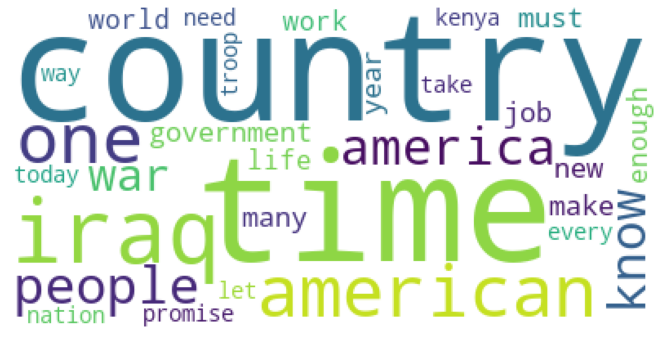

In [15]:
wordcloud = WordCloud(stopwords=_stop_words, max_words=30,
                      background_color="white").generate(' '.join(list(token_list)))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
pos = nltk.pos_tag(token_list)

# keep nouns, adjectives, verbs, adverbs, cardinal digits
filtered_pos = [x for (x,y) in pos if y in ('NN', 'NNS', 'NNP', 'JJ', 'JJR', 'JJS' 'VB', 'RB', 'CD')]

freq = nltk.FreqDist(filtered_pos)
print(freq.most_common(50))

[('american', 73), ('country', 67), ('people', 67), ('time', 66), ('iraq', 61), ('one', 59), ('year', 49), ('america', 46), ('government', 46), ('war', 44), ('work', 43), ('promise', 37), ('job', 35), ('many', 35), ('threat', 35), ('new', 33), ('enough', 32), ('nation', 32), ('care', 32), ('iraqi', 32), ('life', 31), ('troop', 29), ('today', 28), ('right', 28), ('way', 28), ('world', 27), ('change', 26), ('family', 25), ('weapon', 25), ('force', 25), ('child', 24), ('health', 23), ('together', 23), ('kenya', 22), ('great', 21), ('state', 21), ('idea', 21), ('president', 21), ('let', 21), ('last', 21), ('party', 21), ('program', 21), ('security', 21), ('woman', 20), ('terrorist', 20), ('even', 20), ('corruption', 20), ('generation', 19), ('economy', 19), ('hope', 18)]


In [17]:
f = open("./processed/token-list.txt", "w")
f.write(' '.join(list(token_list)))
f.close()

f = open("./processed/pos-filtered.txt", "w")
f.write(' '.join(list(filtered_pos)))
f.close()

In [18]:
# minimized processing with dicts because repeating too much work with loops otherwise
# 150 common_words x 6 fileids x sentences(937 total) x words + append/join sentence + 6x search fileids
from nltk.tokenize.treebank import TreebankWordDetokenizer

common_words = dict(freq.most_common(150))
print(common_words)

data = []
hmap = {}
detokenized = {}

for word, frequency in common_words.items():
    datum = { 'word': word, 'frequency': frequency }
    docs = []
    sents = []

    for key, fileid in enumerate(corpus.fileids()):
        if key not in hmap:
            hmap[key] = {}

        for s_id, sentence in enumerate(corpus.sents(fileid)):
            if key in hmap and s_id in hmap[key]:
                words = hmap[key][s_id]
            else:
                words = [lemmatizer.lemmatize(w.lower()) for w in sentence] 
                hmap[key][s_id] = words

            if word in words:
                s_key = f'{key}-{s_id}'
                sent = ''

                if s_key in detokenized:
                    sent = detokenized[s_key]
                else:
                    sent = TreebankWordDetokenizer().detokenize(sentence)
                    detokenized[s_key] = sent
                
                sents.append(sent)
                if fileid not in docs:
                    docs.append(fileid)
    
    datum.update({ 'docs': docs, 'sentences': sents})
    data.append(datum)

print(data[:2])

{'american': 73, 'country': 67, 'people': 67, 'time': 66, 'iraq': 61, 'one': 59, 'year': 49, 'america': 46, 'government': 46, 'war': 44, 'work': 43, 'promise': 37, 'job': 35, 'many': 35, 'threat': 35, 'new': 33, 'enough': 32, 'nation': 32, 'care': 32, 'iraqi': 32, 'life': 31, 'troop': 29, 'today': 28, 'right': 28, 'way': 28, 'world': 27, 'change': 26, 'family': 25, 'weapon': 25, 'force': 25, 'child': 24, 'health': 23, 'together': 23, 'kenya': 22, 'great': 21, 'state': 21, 'idea': 21, 'president': 21, 'let': 21, 'last': 21, 'party': 21, 'program': 21, 'security': 21, 'woman': 20, 'terrorist': 20, 'even': 20, 'corruption': 20, 'generation': 19, 'economy': 19, 'hope': 18, 'long': 18, 'school': 18, 'progress': 18, 'politics': 17, 'two': 17, 'part': 17, 'problem': 17, 'future': 17, 'plan': 17, 'help': 17, 'day': 17, 'well': 17, 'john': 17, 'kenyan': 17, 'face': 16, 'dream': 16, 'still': 16, 'freedom': 16, 'hard': 16, 'first': 16, 'opportunity': 16, 'military': 16, 'clear': 16, 'never': 15, 

In [19]:
import json
d = json.dumps(data)
f = open("./processed/data.json", "w")
f.write(d)
f.close()

In [20]:
import pandas as pd

df = pd.read_json('./processed/data.json')

df.to_csv('./processed/data.csv')

In [21]:
df.head(25)

,word,frequency,docs,sentences
0,american,73,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....","[It was here, in Springfield, where North, Sou..."
1,country,67,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....","[It' s humbling, but in my heart I know you di..."
2,people,67,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....",[In the face of a politics that' s shut you ou...
3,time,66,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....","[I became a civil rights lawyer, and taught co..."
4,iraq,61,"[doc1.txt, doc2.txt, doc3.txt, doc5.txt]","[And when all else fails, when Katrina happens..."
5,one,59,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....",[In the face of a politics that' s shut you ou...
6,year,49,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....","[I was a young man then, just a year out of co..."
7,america,46,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....","[And I accepted the job, sight unseen, motivat..."
8,government,46,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....",[I saw that the problems people faced weren' t...
9,war,44,"[doc1.txt, doc2.txt, doc3.txt, doc4.txt, doc5....","[In the face of war, you believe there can be ..."
